# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import math
import timeit

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Data Reading

In [2]:
def read_data(city_name):
    trip_data = pd.read_csv(city_name+".csv", encoding = "ISO-8859-1")
    trip_data["trip_duration"] = pd.to_timedelta(trip_data["trip_duration"])
    trip_data["datetime_start"] = pd.to_datetime(trip_data["datetime_start"])
    trip_data["datetime_end"] = pd.to_datetime(trip_data["datetime_end"])
    trip_data["day"] = pd.to_datetime(trip_data["day"])
    return trip_data

# KPI Generation

In [3]:
Duesseldorf_set = read_data("duesseldorf")
Bremen_set = read_data("bremen")

In [4]:
#plots for both cities for given time intervall and value (you can select the plot title)
def distanceplot(time, value,  title, fleetSizeColumn, size):
    #sums up the value for a given time per city
    TVB = Bremen_set.groupby(time)[value].sum() 
    TVD = Duesseldorf_set.groupby(time)[value].sum()    
    
    if (fleetSizeColumn != "total"):        
        #for each time is one fleet size given       
        fleetSize_B_set_FZ = extractValue(Bremen_set, time, value).groupby(time)[fleetSizeColumn].sum()
        fleetSize_D_set_FZ = extractValue(Duesseldorf_set, time, value).groupby(time)[fleetSizeColumn].sum() 
        
        #normalize values with the fleet size (value/fleetsize)
        normalizeValues(TVB, time, fleetSize_B_set_FZ)
        normalizeValues(TVD, time, fleetSize_D_set_FZ)
        
    #plots bremen graph
    fix, ax = plt.subplots(figsize=(24,8),dpi = 100) 
    ax.set_ylim(0, size)
    ax.plot(TVB )
    ax.set_title(title + " bremen")
    
    #plots duesseldorf graph
    fix, ax = plt.subplots(figsize=(24,8),dpi = 100)
    ax.set_ylim(0, size)
    ax.plot(TVD, "g")
    ax.set_title(title + " duesseldorf")    
    
    #plots both cities
    fix, ax = plt.subplots(figsize=(24,8), dpi = 100)
    ax.set_ylim(0, size)
    ax.plot(TVD, "g")
    ax.plot(TVB)
    plt.legend(["duesseldorf", "bremen"])
    ax.set_title(title + " bremen vs duesseldorf")
    
    plt.show()   
    
#drops for a given time period all duplicate items and sorts them after
def extractValue(Value_set, time, value):
    temp_Value_set = Value_set
    temp_Value_set = temp_Value_set.sort_values(by=[time], inplace=False)        
    return temp_Value_set.drop_duplicates(subset=[time])

#divides the value through the fleetSize at the given time
def normalizeValues(Value_set, time, fleetSize):
    time_Set = set(Bremen_set[time])
    time_Set_L = sorted(time_Set)
    
    for t in time_Set_L:        
        tempV = Value_set[t] 
        tempF = fleetSize[t]
        Value_set[t] = tempV/tempF
    return Value_set        

In [16]:
#
def distancebar():
    labels = ['Feb', 'Mär', 'Apr', 'Mai', 'Jun']
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    str_dist_bre_monthly = Bremen_set.groupby("month")["distance"].sum()
    str_dist_dus_monthly = Duesseldorf_set.groupby("month")["distance"].sum()
    fig, ax = plt.subplots()
    rects_bre = ax.bar(x - width/2, str_dist_bre_monthly, width, label='bremen')
    rects_dus = ax.bar(x + width/2, str_dist_dus_monthly, width, label='duesseldorf')
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('total distance')
    ax.set_title('total distance per month')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

In [17]:
def plot_distance_temp(name, period):
    if(name == "bremen"):
        df = Bremen_set
    else:
        df = Duesseldorf_set 
    # sums up distances
    str_dist = df.groupby(period)["distance"].sum()
    
    # gets an avg value of the included rows, based on the period
    str_temp_plot = df.groupby(period)["temp"].mean()
    
    fix, ax1 = plt.subplots(figsize=(30,6), dpi = 100)
    ax1.plot(str_dist)
    ylabel = 1400
    if(period == 'week') :
        ylabel = 8700
    ax1.set_ylim(0, ylabel)
    ax1.set_title('Zurückgelegte Distanz verglichen mit der Temperatur - ' + name)
    ax1.set_xlabel('Datum')
    ax1.set_ylabel('Aufsummierte Distanz')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Temperatur', color='orange')  # we already handled the x-label with ax1
    ax2.plot(str_temp_plot, color='orange')
    ax2.tick_params(axis='y')
    ax2.set_ylim(0,30)
    plt.show()


# Plotting

## Total trip distance 

### Total distance per city

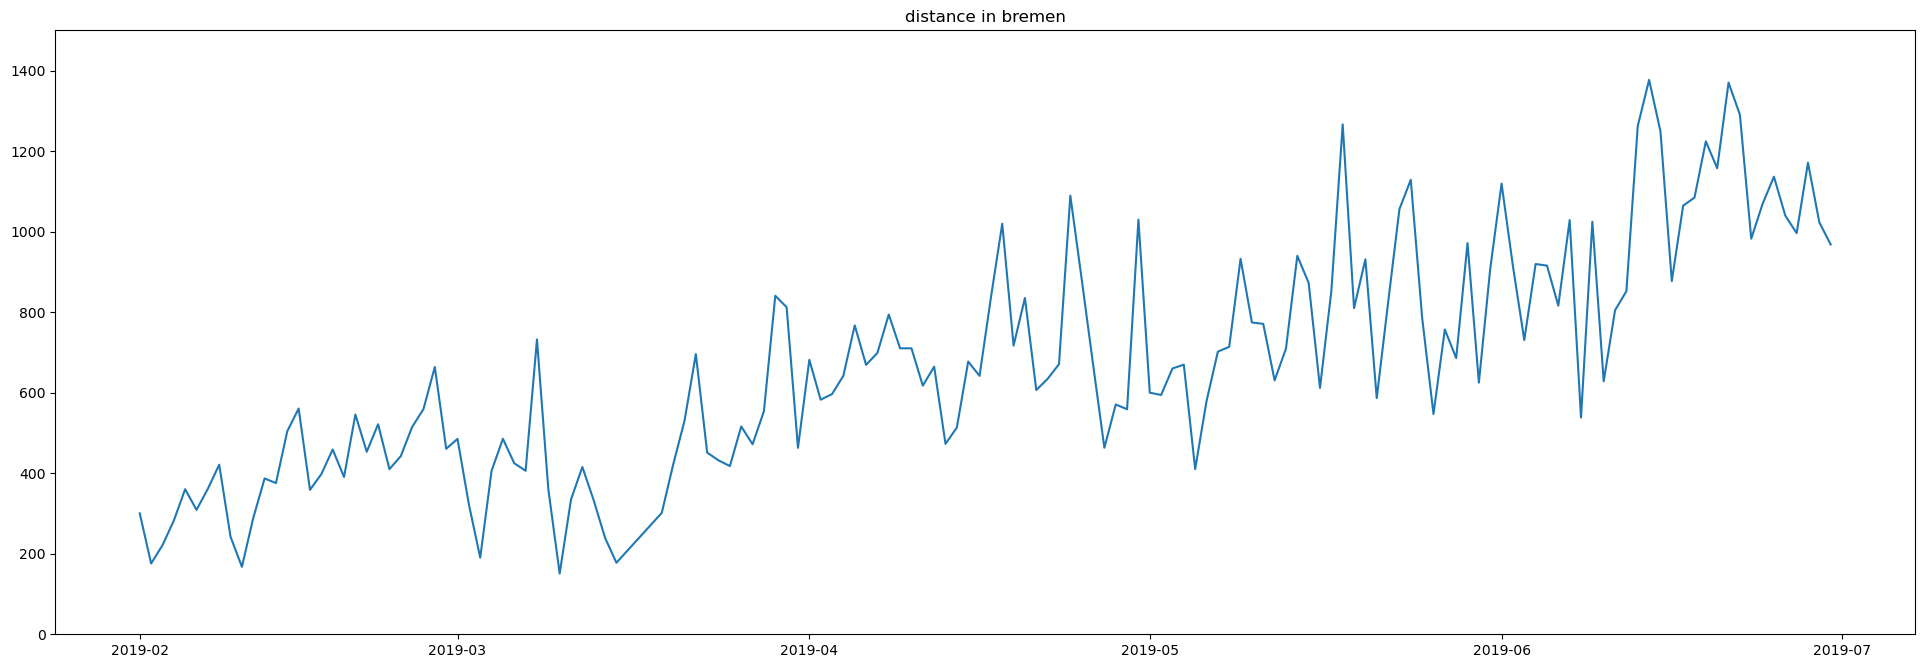

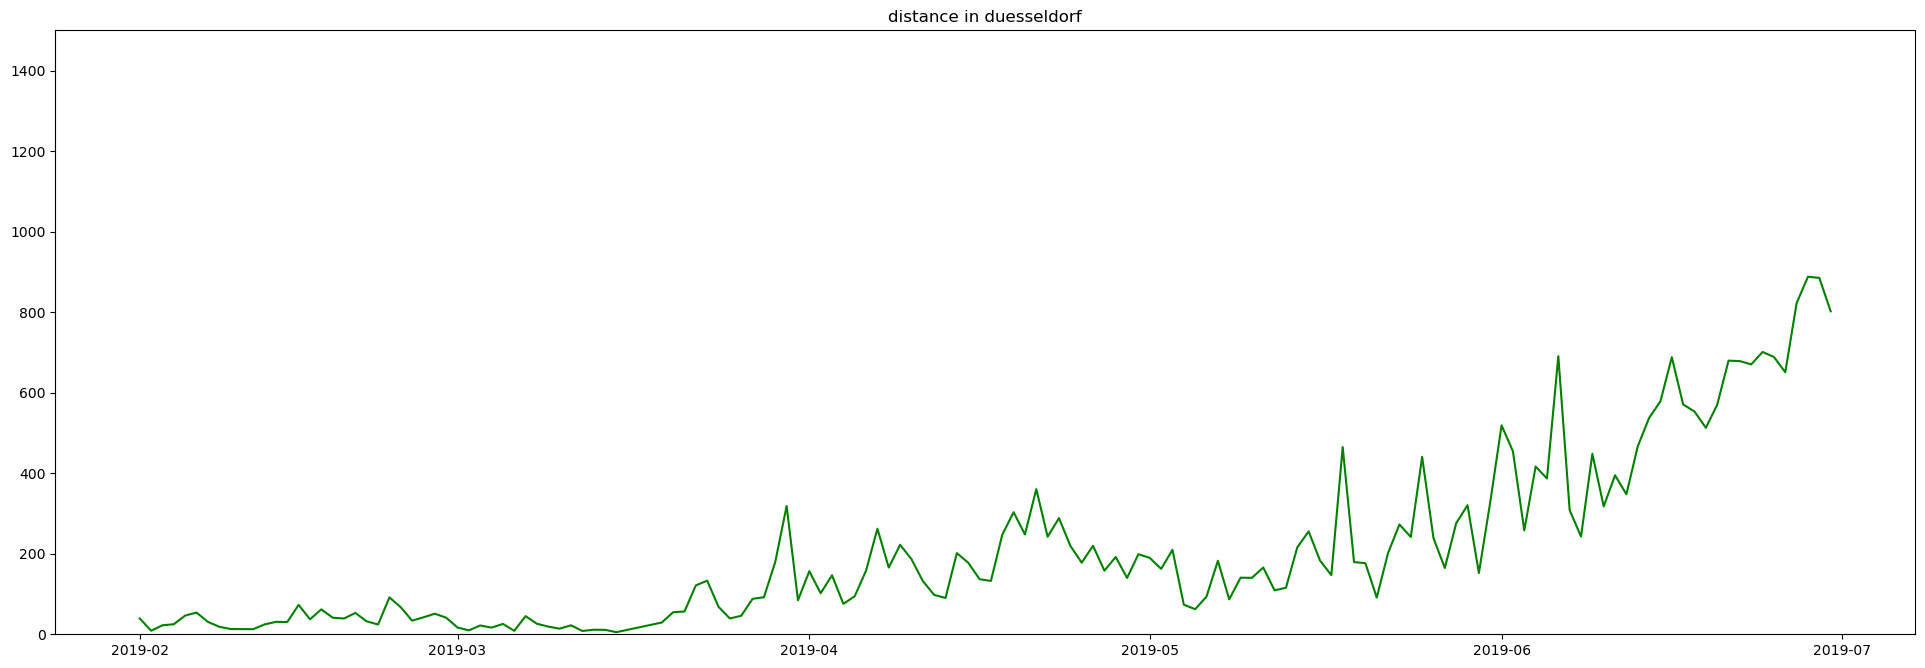

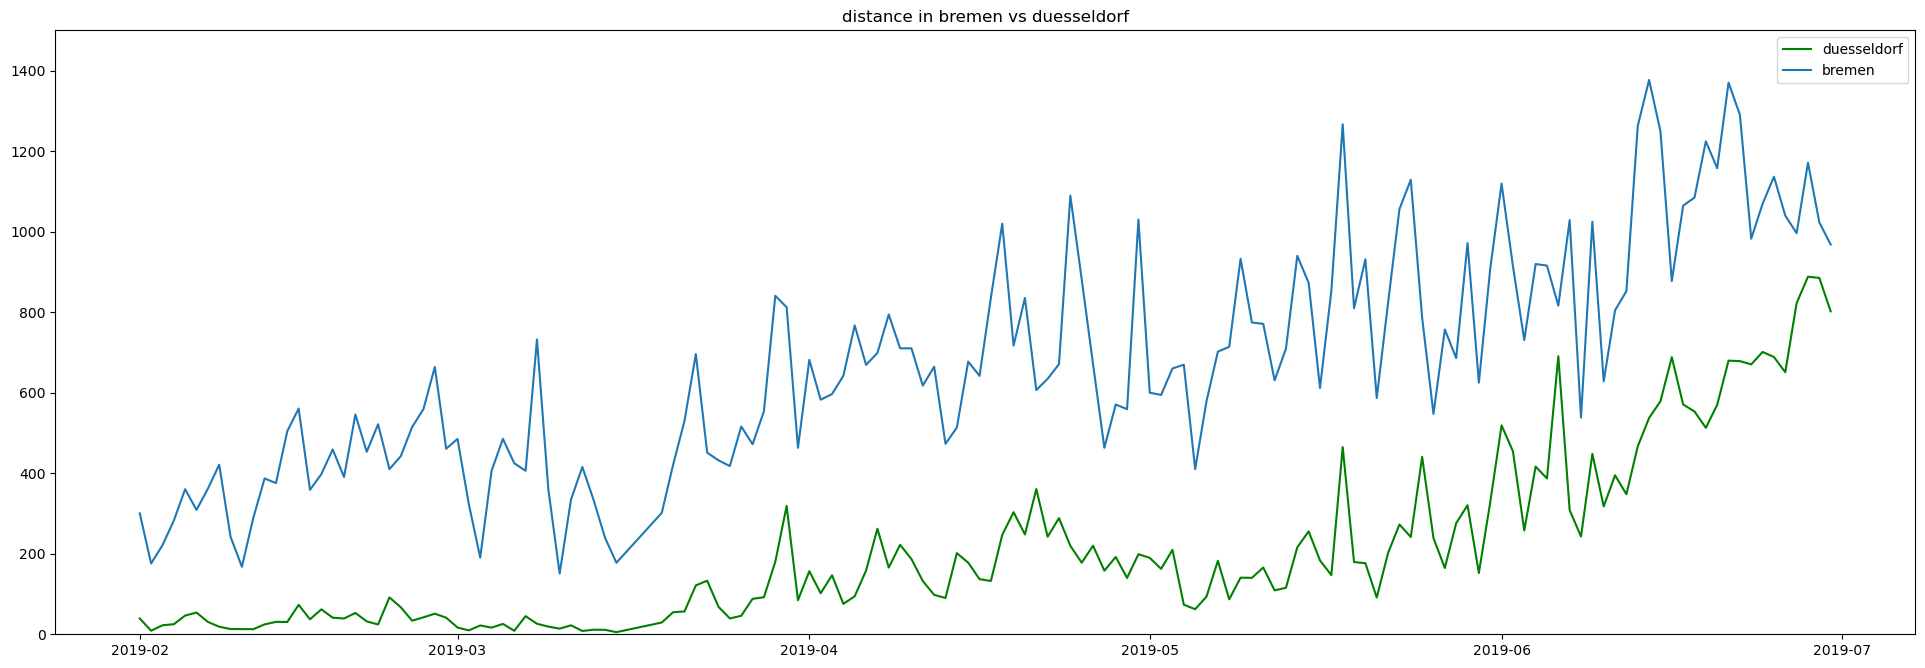

In [7]:
distanceplot("day", "distance",  "distance in", "total", 1500)

### Distance comparisation between bremen and dusseldorf

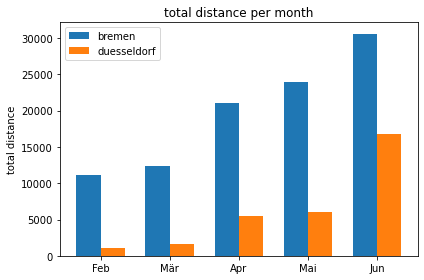

In [8]:
distancebar()

### Total Distance combined with temperatur

per day:

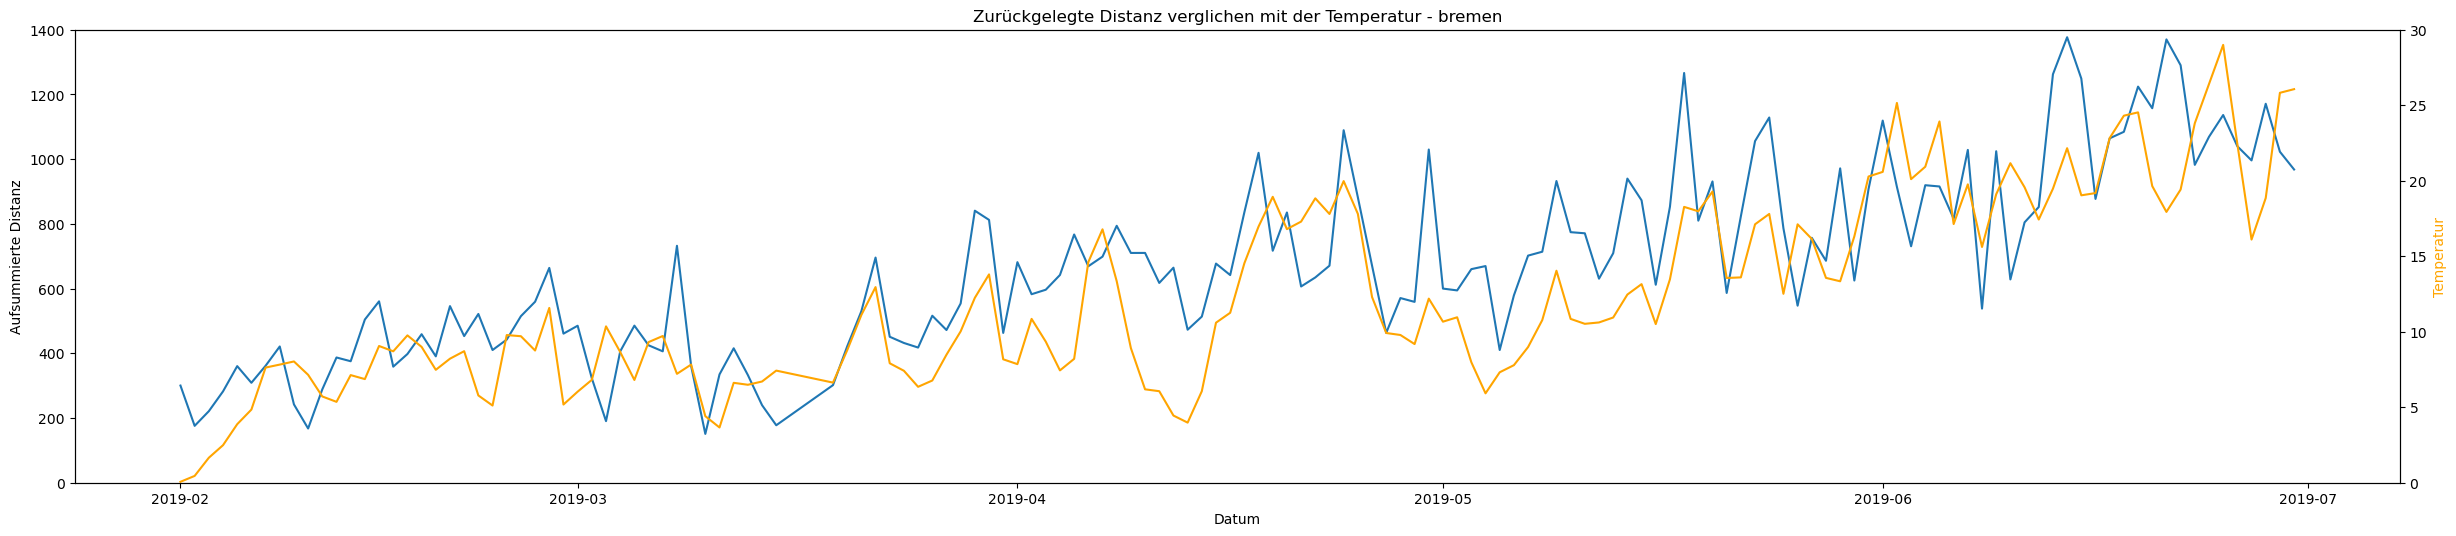

In [18]:
plot_distance_temp("bremen", "day")

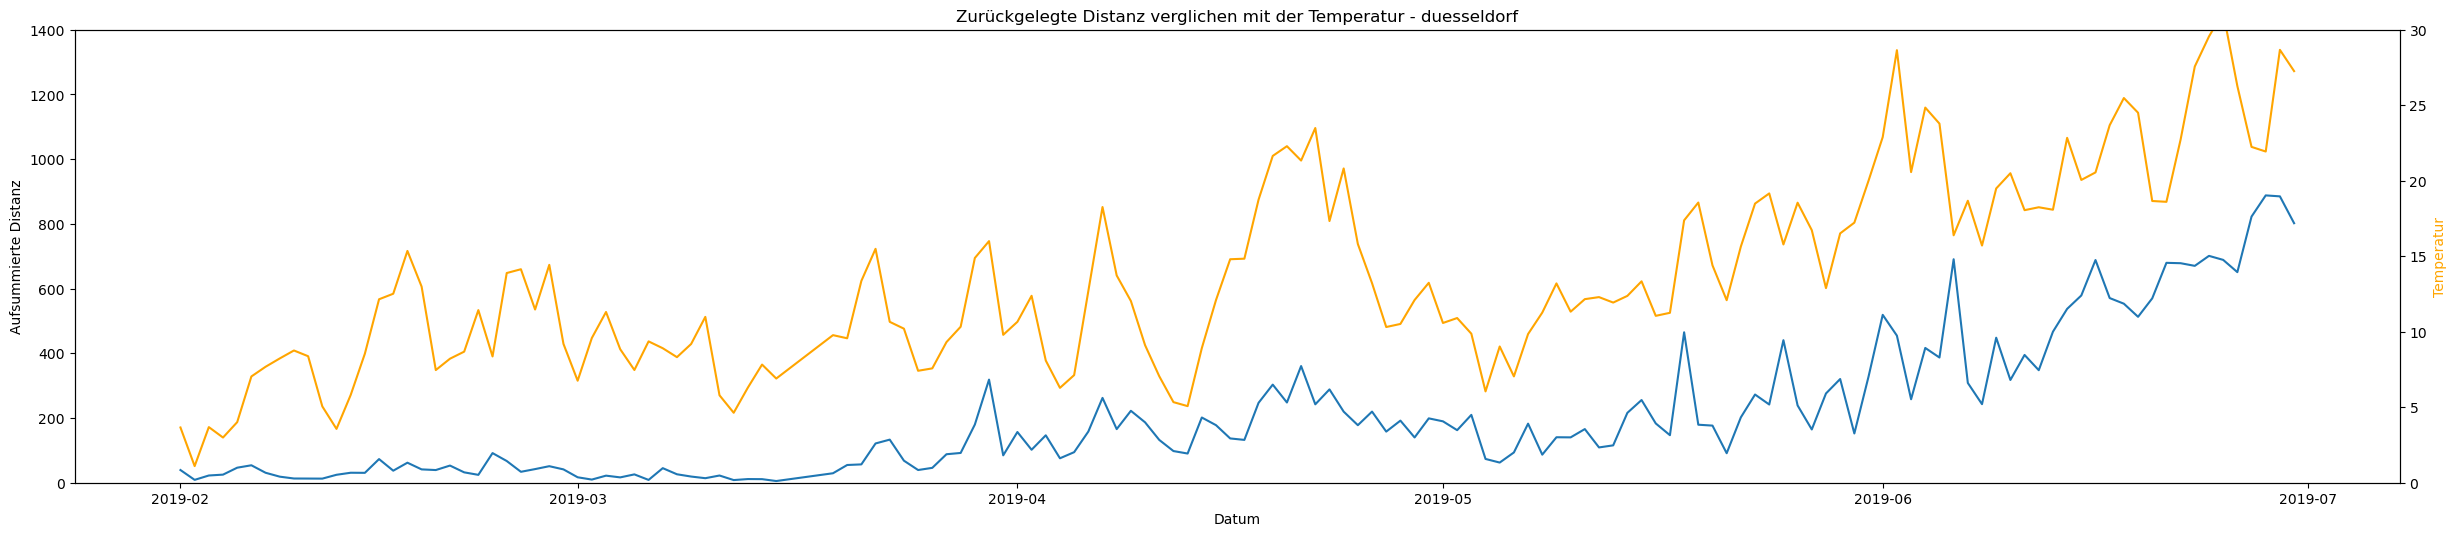

In [19]:
plot_distance_temp("duesseldorf", "day")

per week:

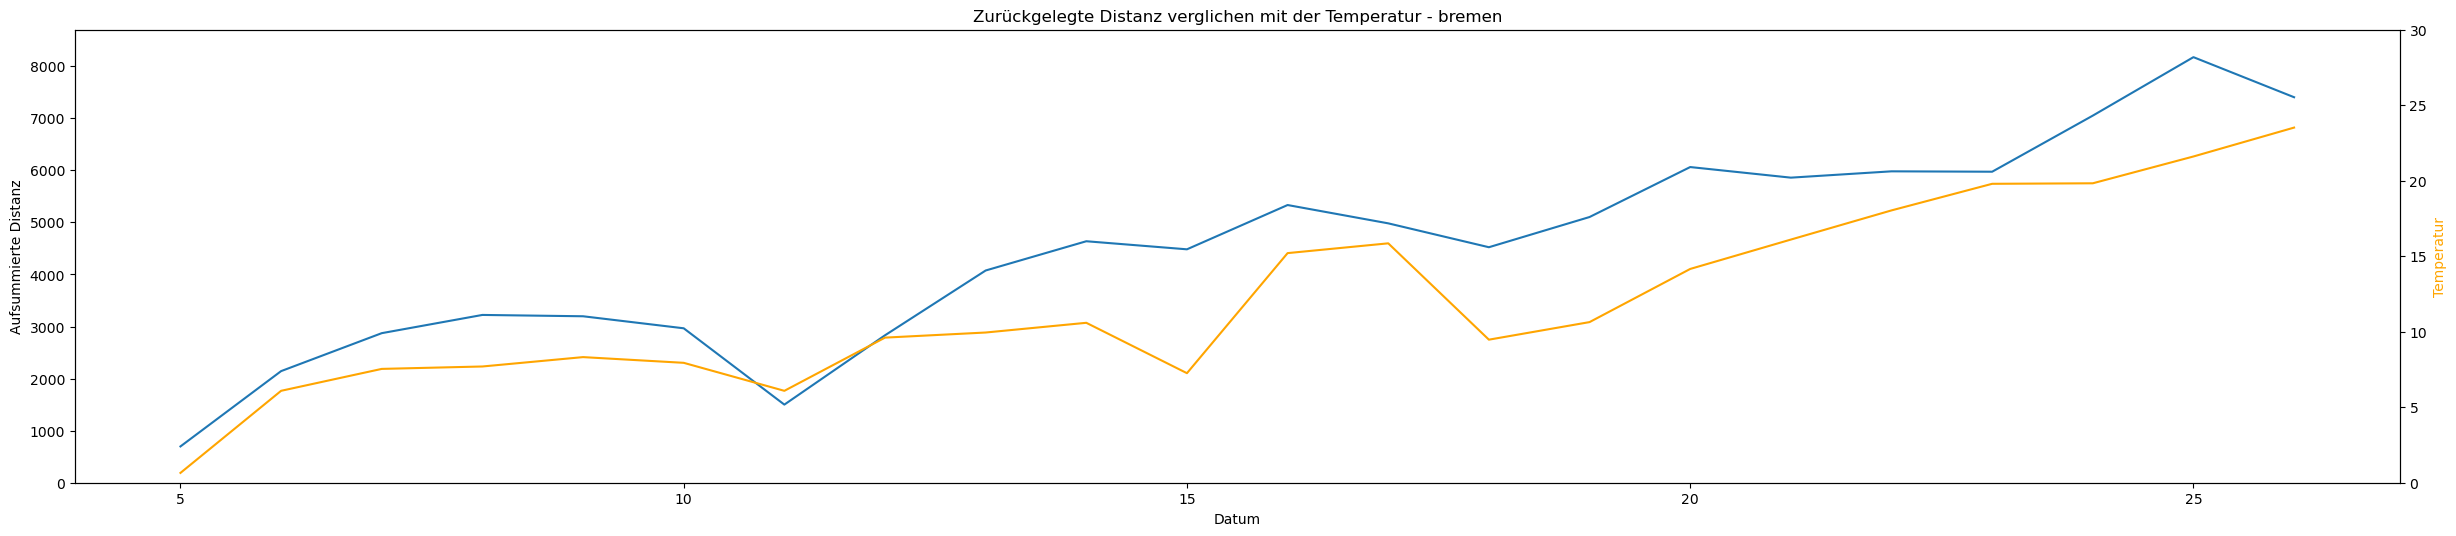

In [20]:
plot_distance_temp("bremen", "week")

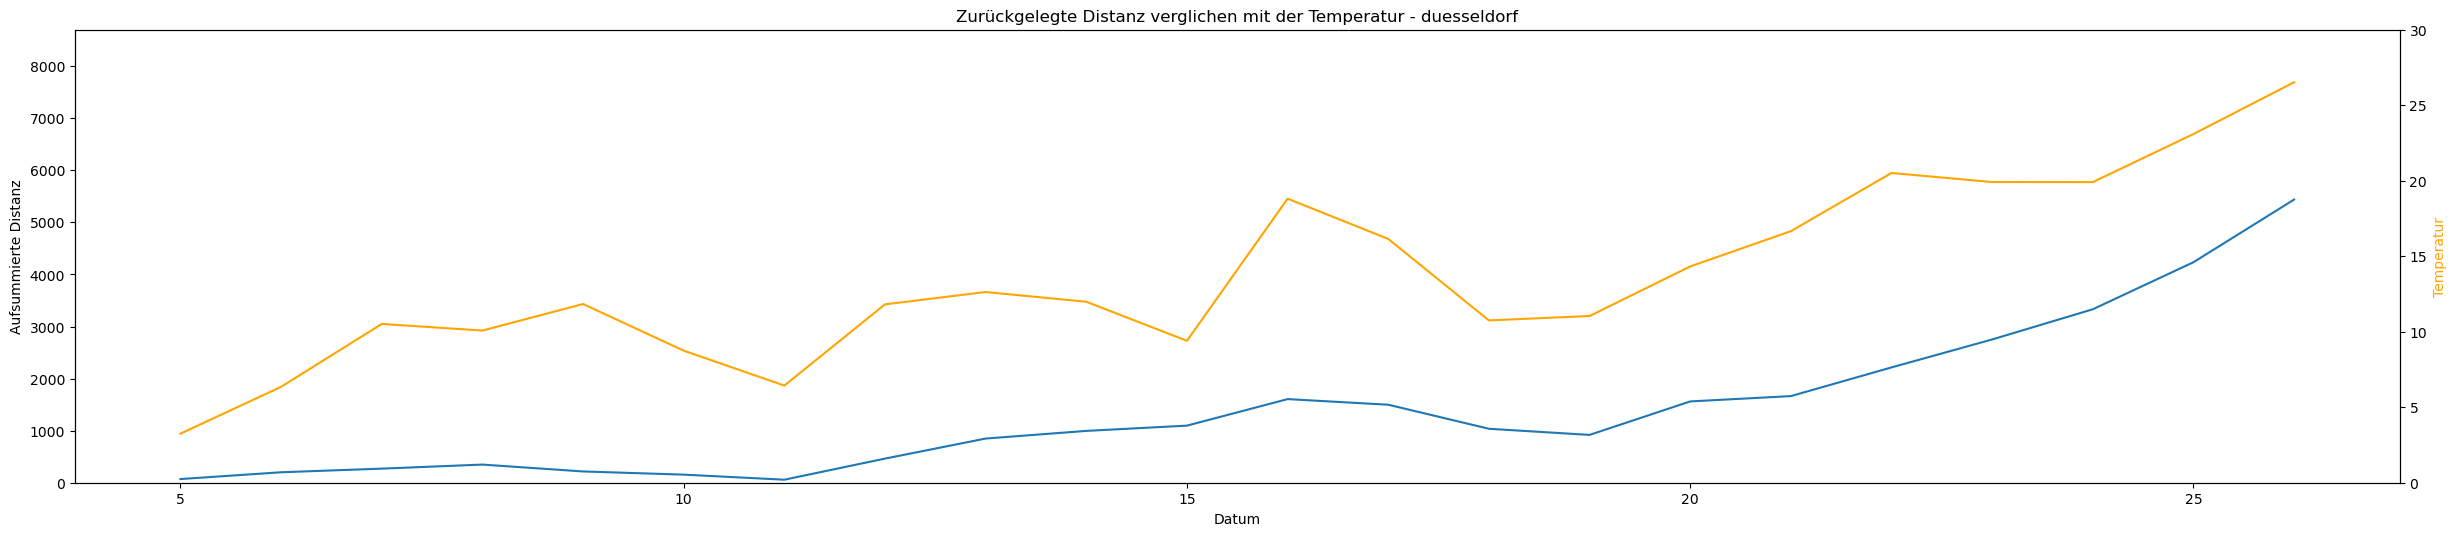

In [21]:
plot_distance_temp("duesseldorf", "week")

## Weighted trip distance 

### weighted trip distance per day

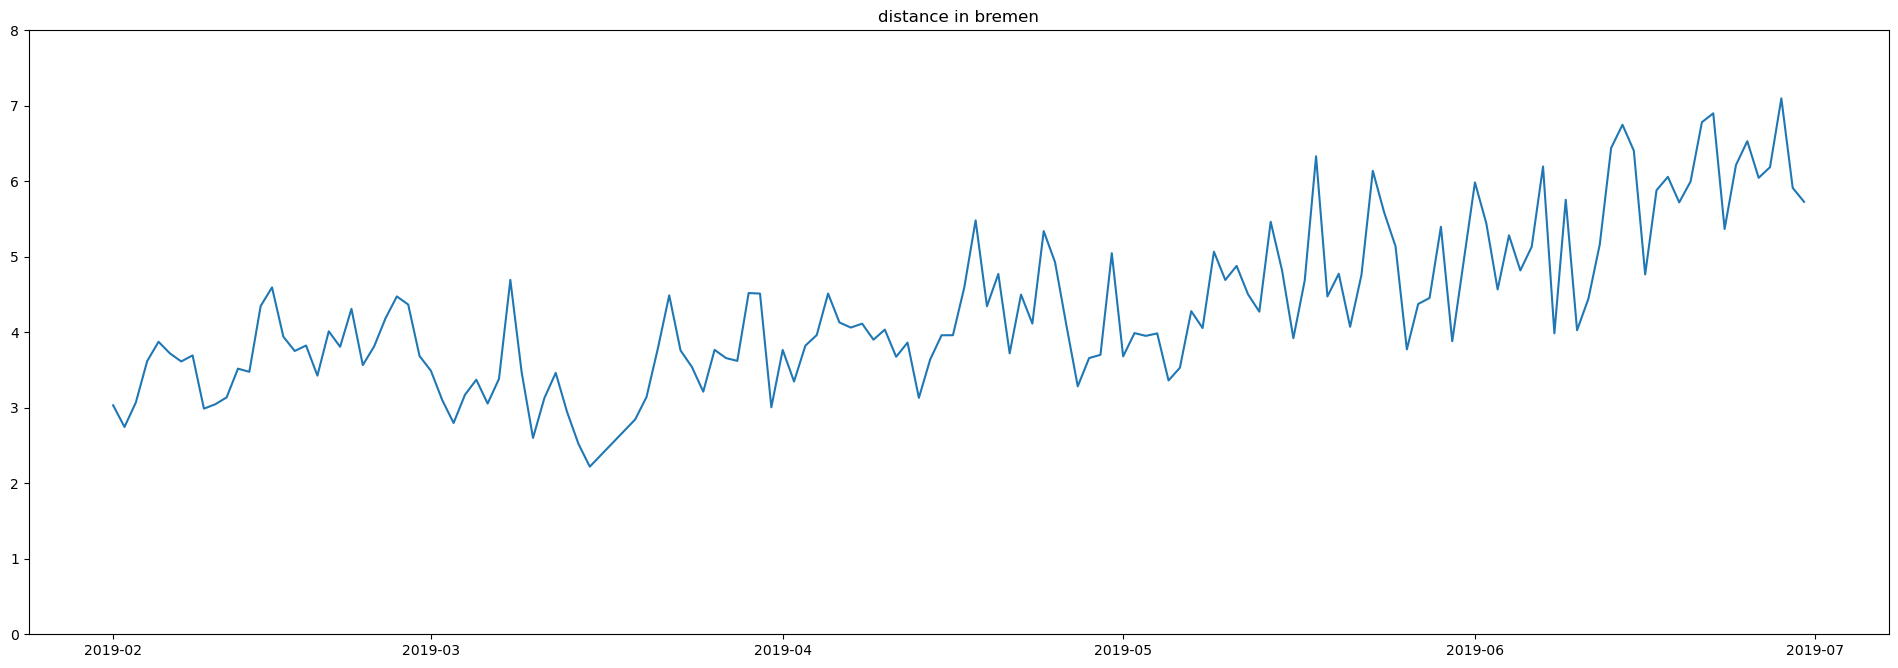

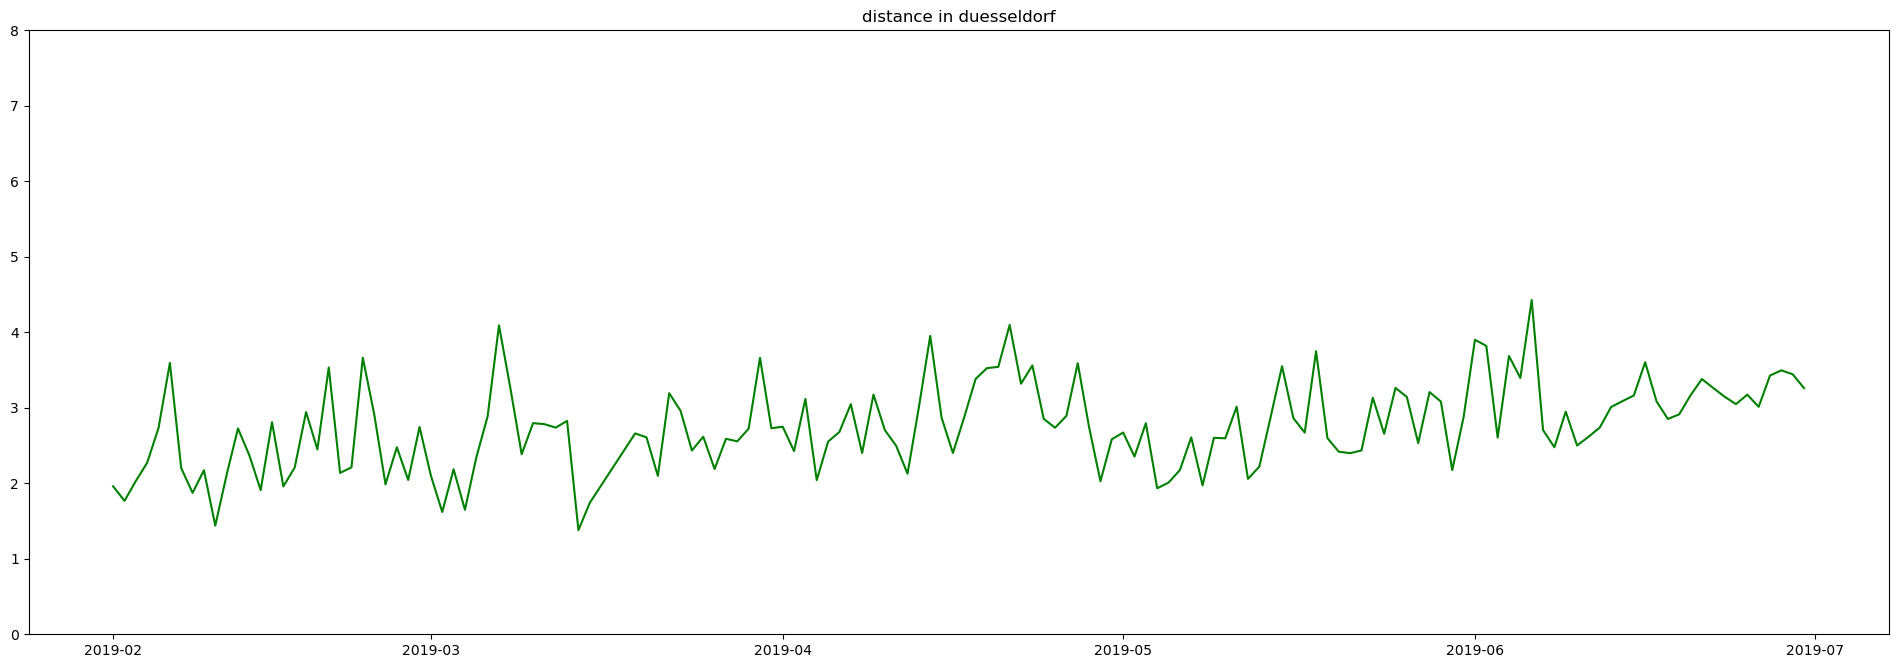

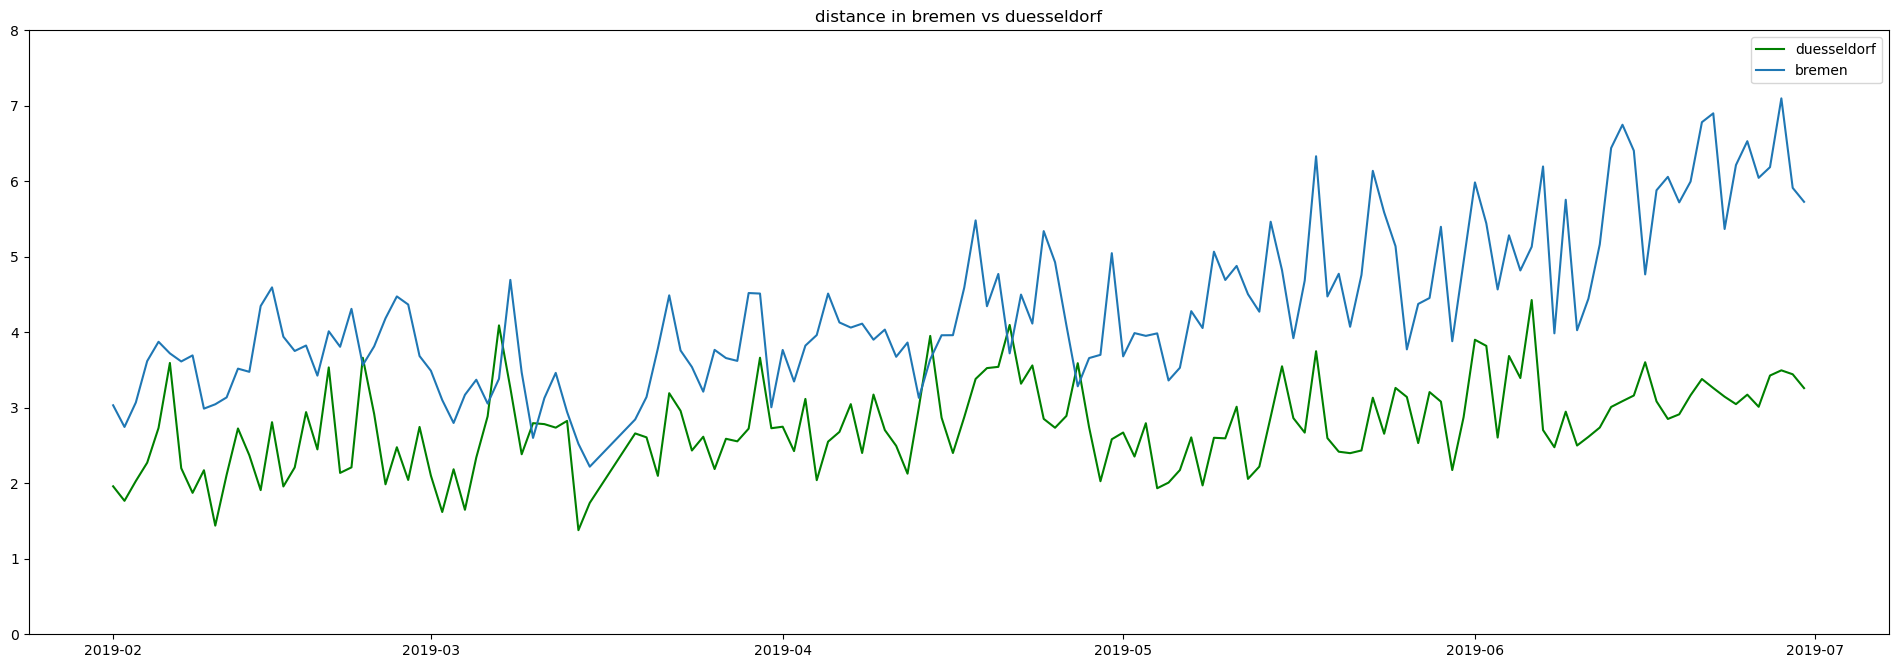

In [13]:
distanceplot("day", "distance",  "distance in", "fleetsize_dayly", 8)

### weighted trip distance per week

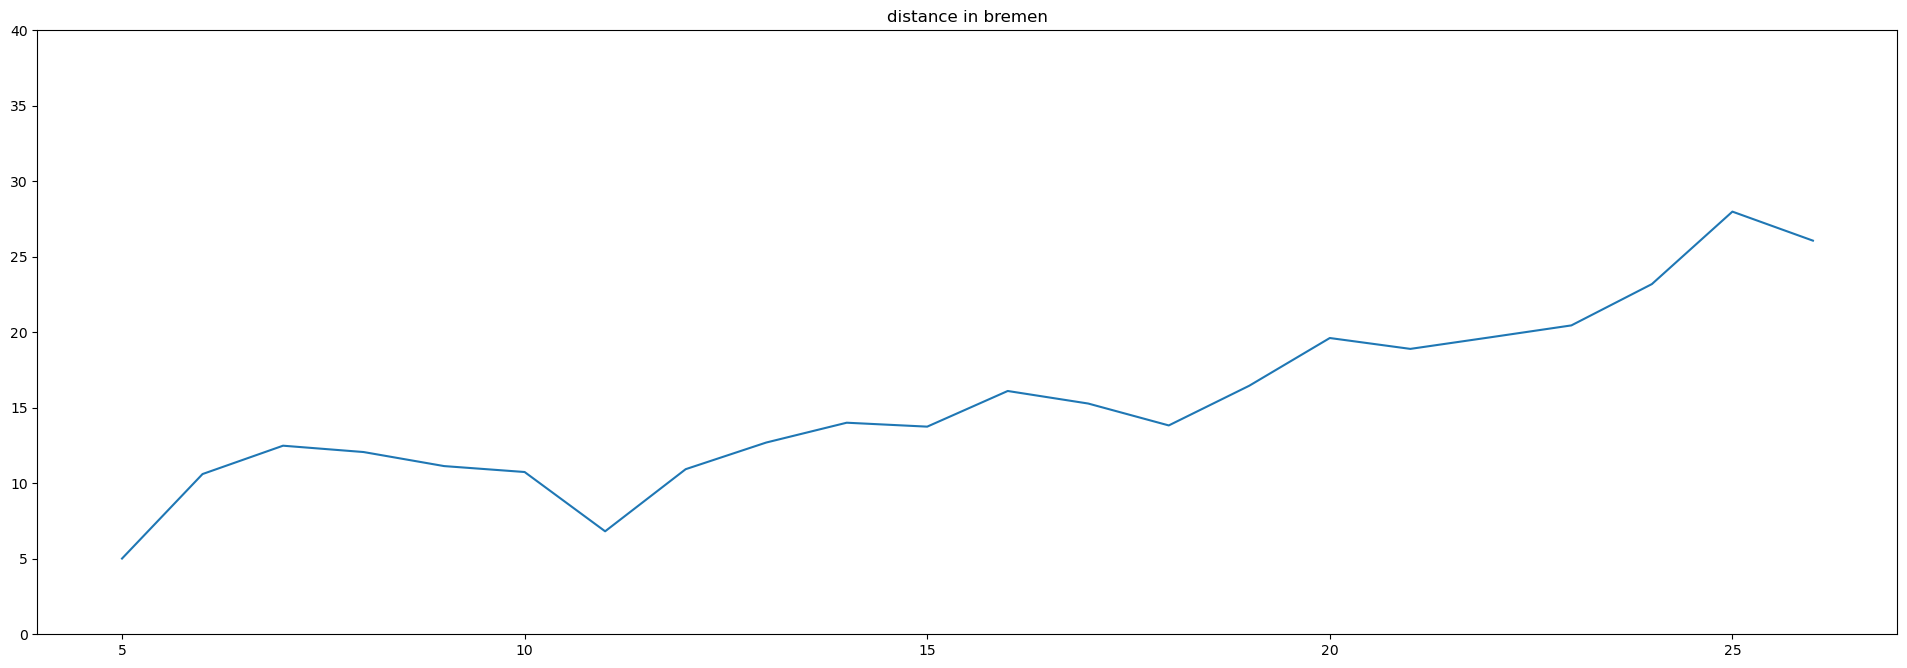

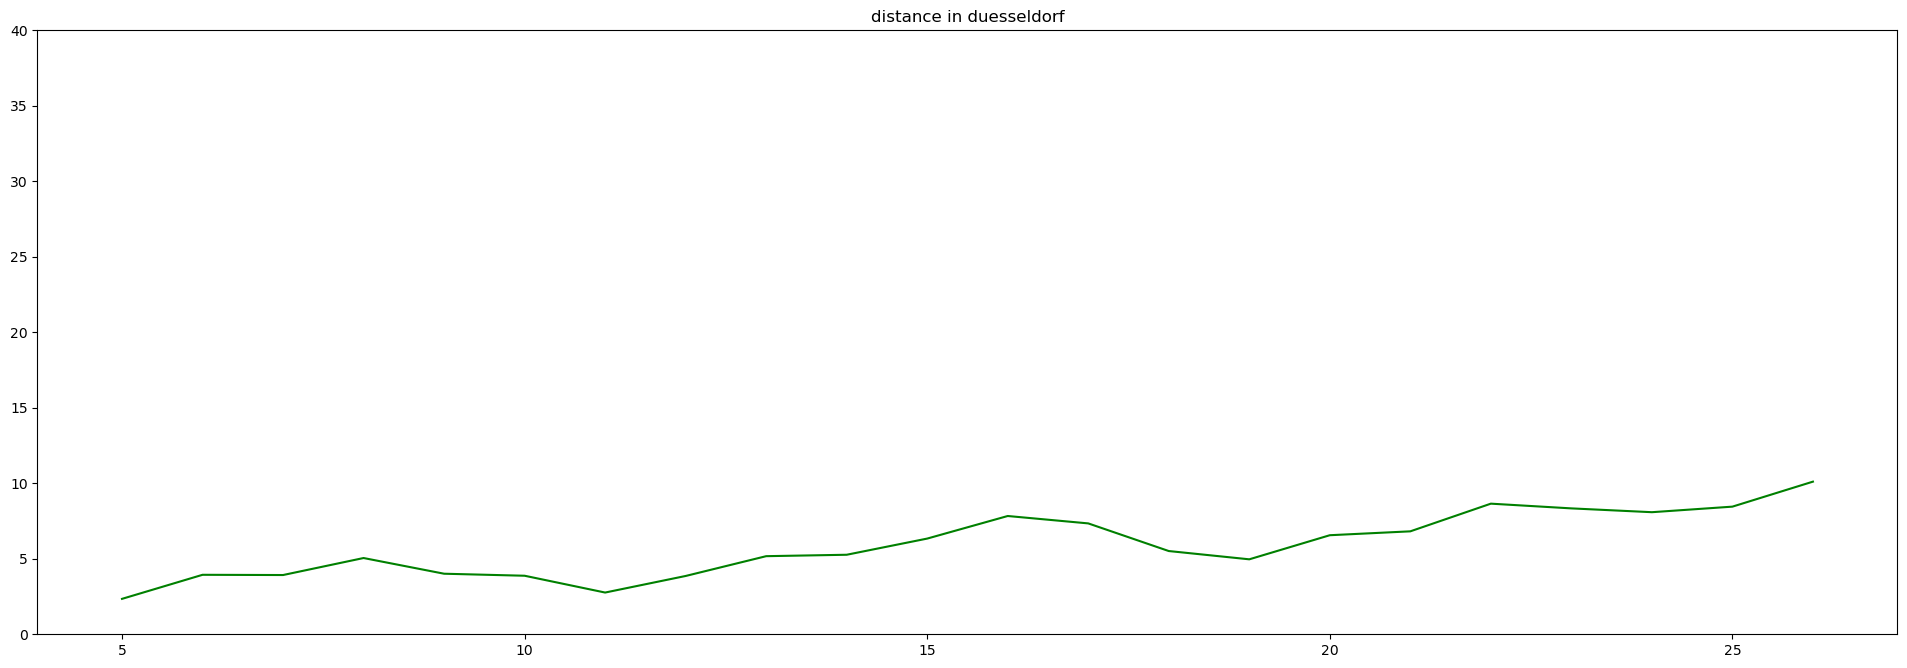

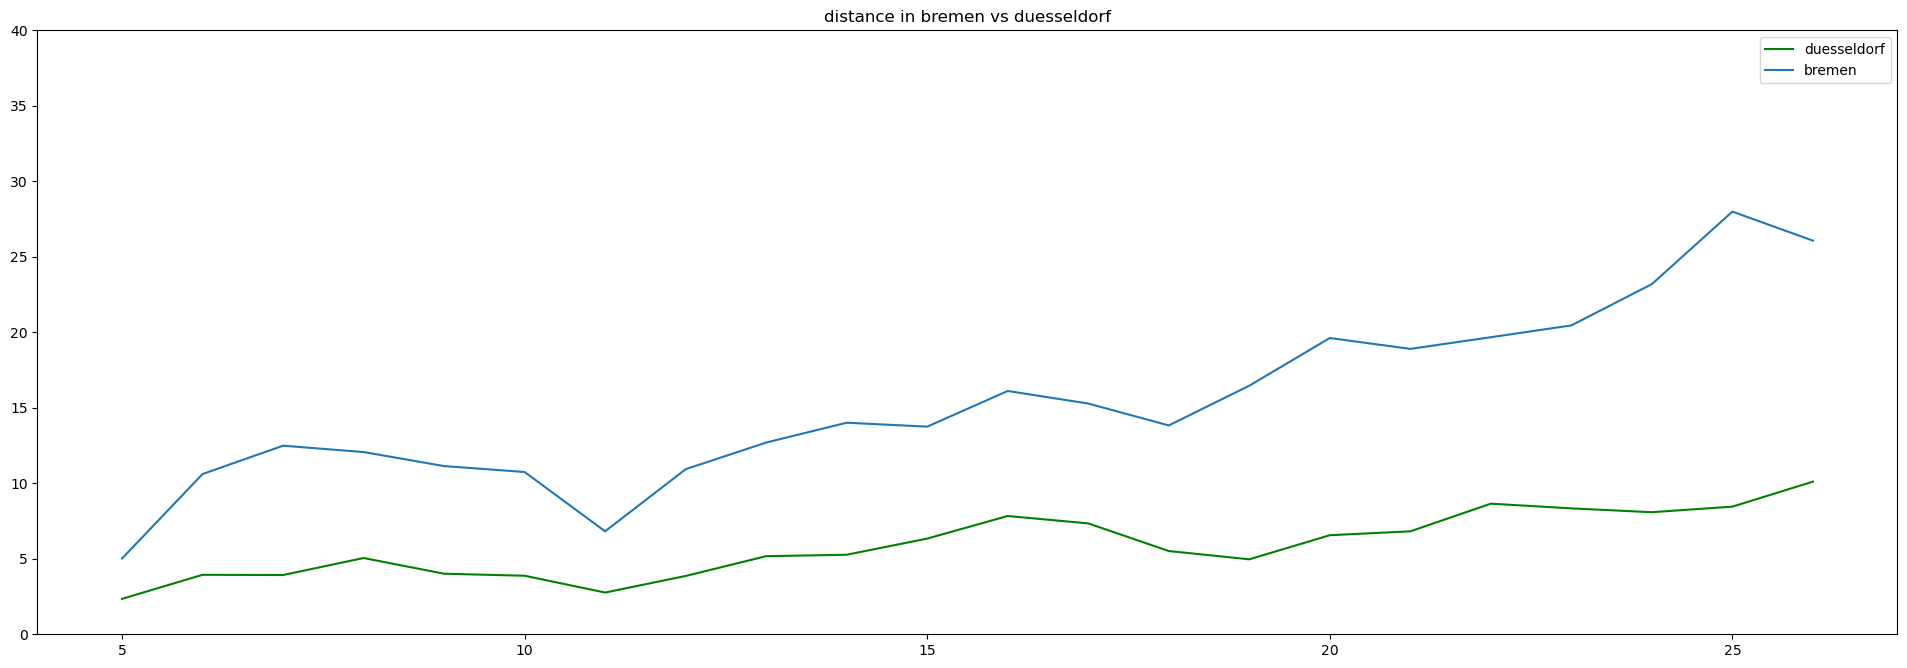

In [14]:
distanceplot("week", "distance",  "distance in", "fleetsize_weekly", 40)

### weighted trip distance per month

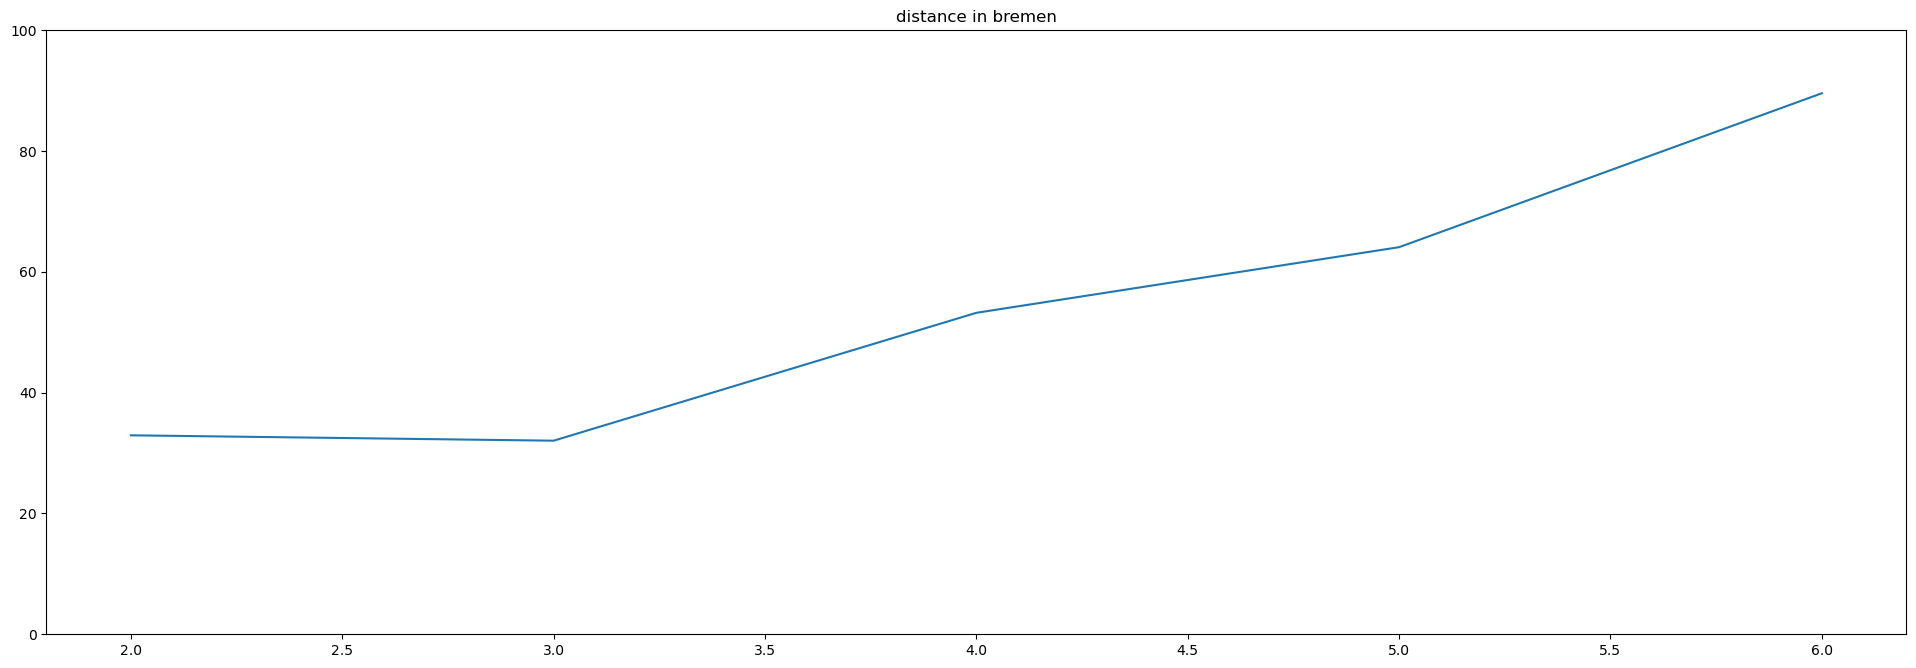

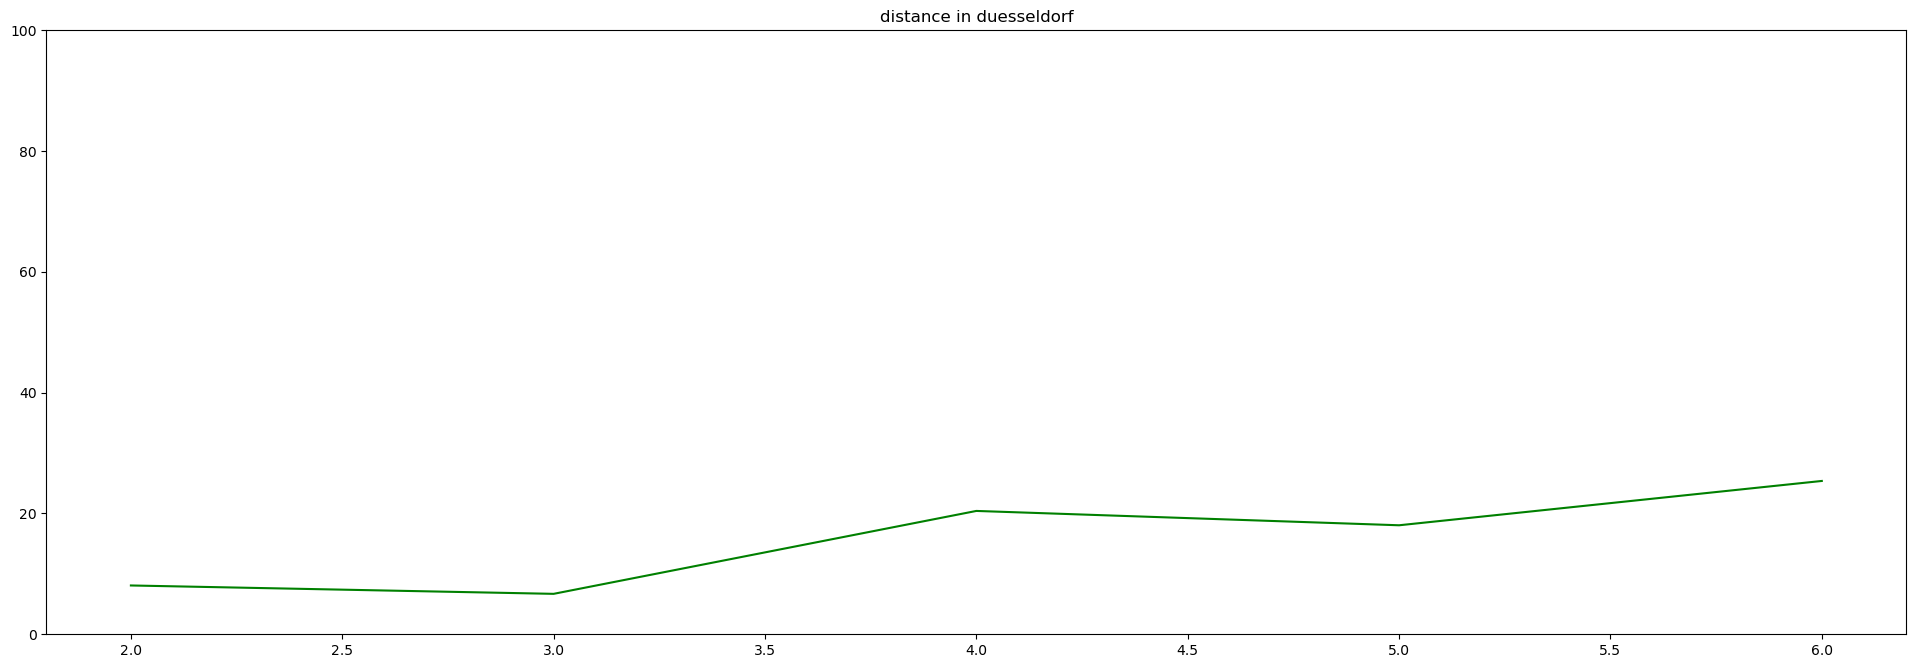

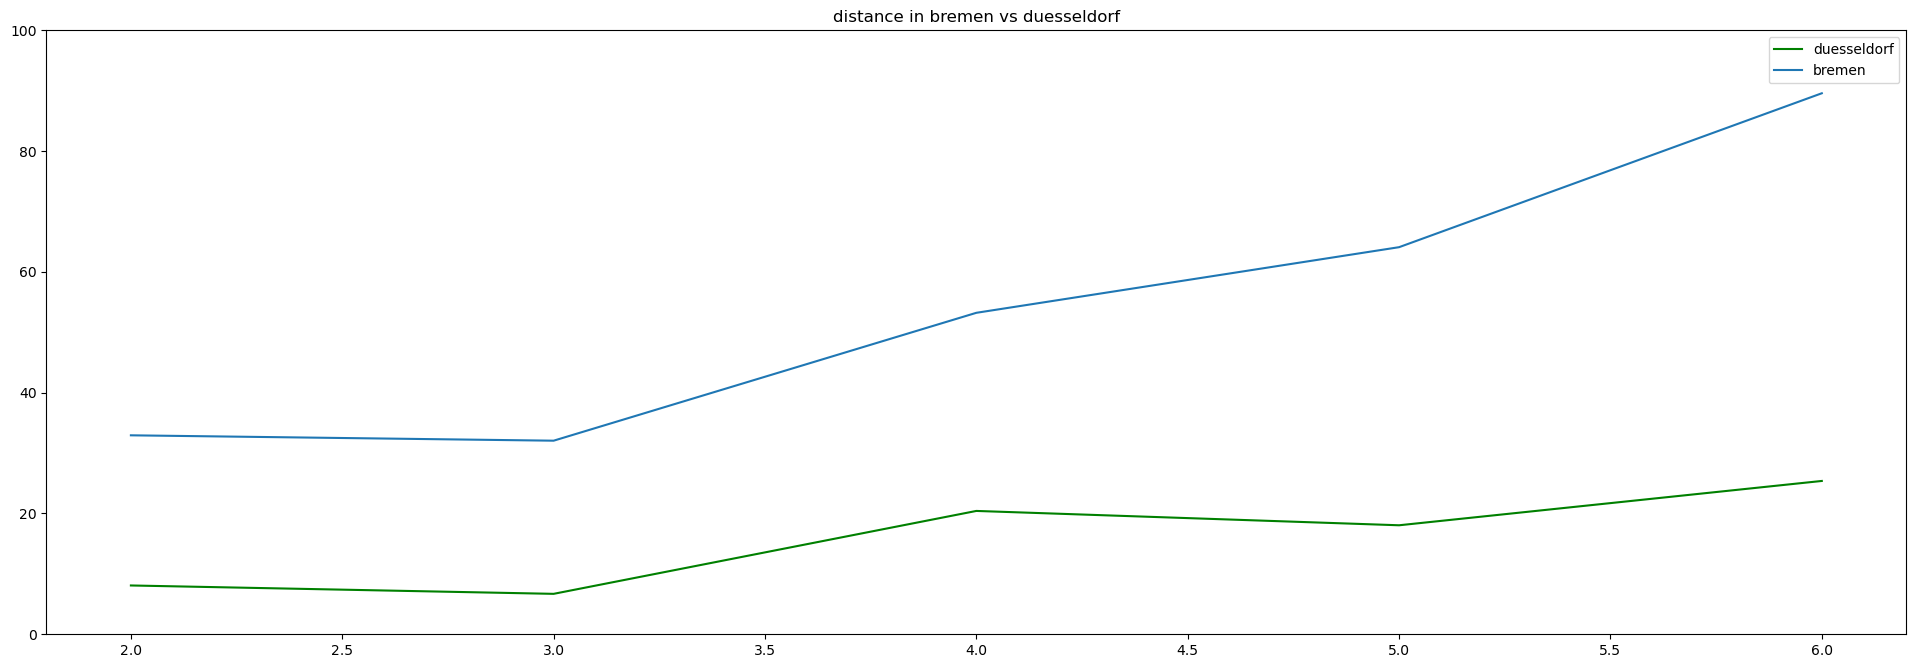

In [15]:
distanceplot("month", "distance",  "distance in", "fleetsize_monthly",100)